In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana_18398265_1544564276.1650.root")
f = r.TFile("./data/results_40M_gasGun_May1.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries : 39960000 : Total =     23789293449 bytes  File  Size = 10443385936 *
*        :          : Tree compression factor =   2.28                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries : 39960000 : Total  Size=  160101311 bytes  File Size  =    1123947 *
*Baskets :     2534 : Basket Size=    1038848 bytes  Compression= 142.40     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries : 39960000 : Total  Size=  160108925 bytes  File Size  =    1125578 *
*Baskets :     2534 : Basket Size=    1038848 bytes  Compression= 142.20     *
*..............................................

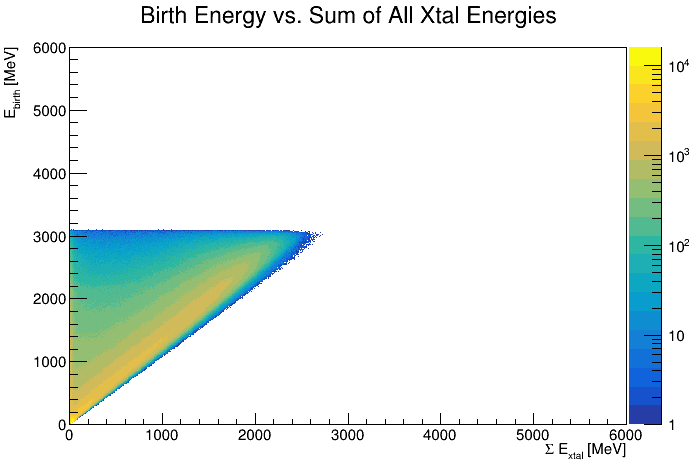

In [3]:
c = r.TCanvas()

h6 = r.TH2D("h6","Birth Energy vs. Sum of All Xtal Energies; #Sigma E_{xtal} [MeV]; E_{birth} [MeV]",600,0,6000,600,0,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2):Sum$(eCaloFrameEdep)>>h6","eCaloFlag == 0","goff")
h6.Draw("colz")

c.SetLogz()
c.Draw()

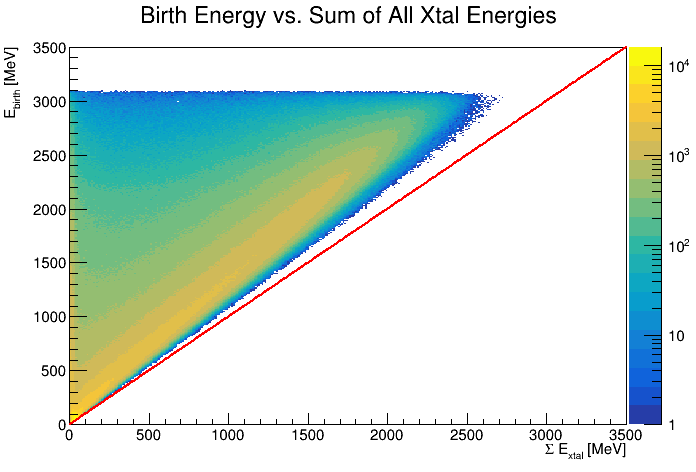

In [4]:
c = r.TCanvas()

h6.Draw("colz")

h6.GetXaxis().SetRangeUser(0,3500)
h6.GetYaxis().SetRangeUser(0,3500)

fone = r.TF1("fone","x",0,6000)
fone.SetLineColor(2)
fone.SetLineStyle(8)
fone.SetNpx(2000)
fone.Draw("SAME")

c.SetLogz()
c.Draw()

---

### Now lets create the PDF hists the same was as we did earlier, but with the sum of the crystal energies

Warning in <TFile::Append>: Replacing existing TH1: he_000_000_000 (Potential memory leak).


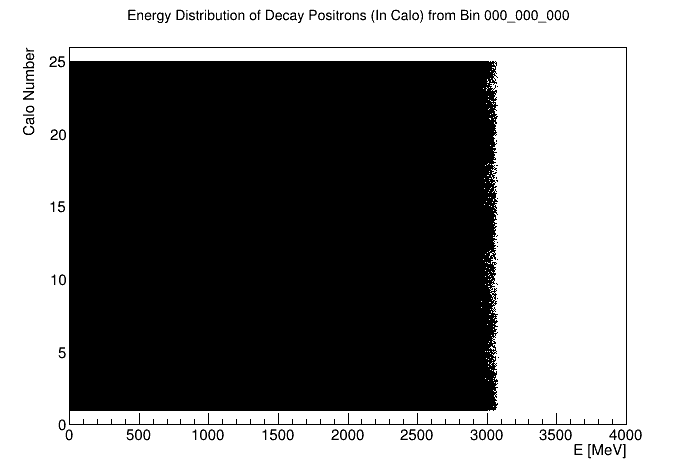

In [11]:
condition = ""
binstring = "000_000_000"
he = r.TH2D("he_"+binstring,
            "Energy Distribution of Decay Positrons (In Calo) from Bin "+str(binstring)+"; E [MeV]; Calo Number", 
            4000,0,4000, 26,0,26)
c = r.TCanvas()
t.Draw("eCaloNum[0]:eCaloE[0]>>he_"+binstring,condition,"") 
c.Draw()

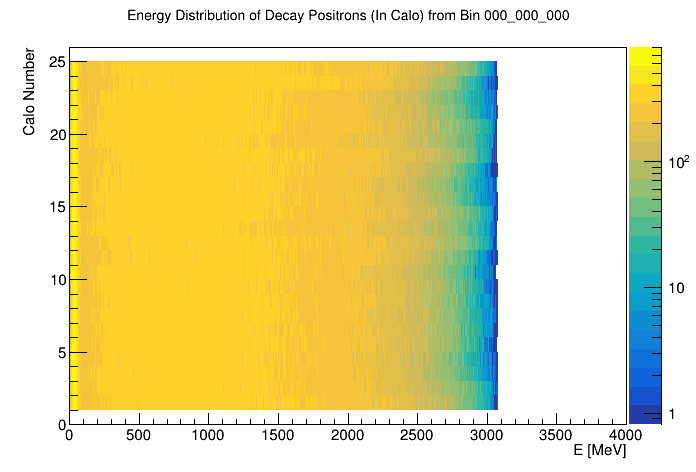

In [13]:
c = r.TCanvas()
he.Draw("colz")
c.SetLogz()
c.Draw()

In [ ]:
he.ProjectionX().Draw()
c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: he_000_000_000 (Potential memory leak).


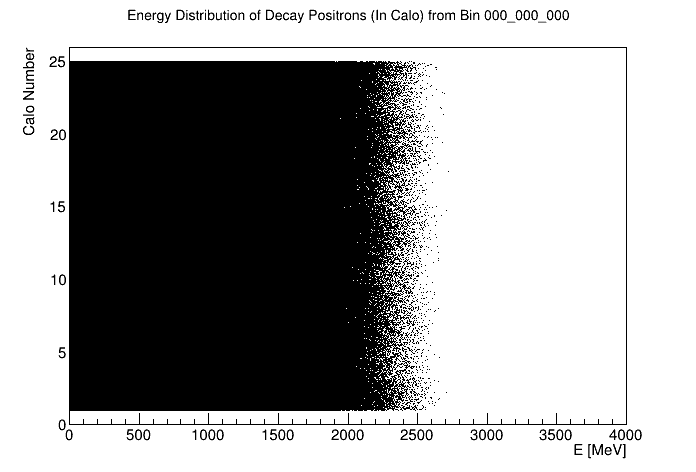

In [14]:
he = r.TH2D("he_"+binstring,
            "Energy Distribution of Decay Positrons (In Calo) from Bin "+str(binstring)+"; E [MeV]; Calo Number", 
            4000,0,4000, 26,0,26)
c = r.TCanvas()
t.Draw("eCaloNum[0]:Sum$(eCaloFrameEdep)>>he_"+binstring,condition,"") 
c.Draw()

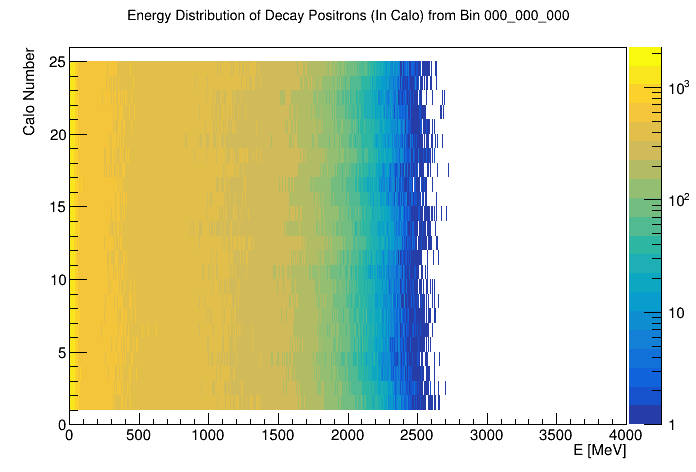

In [15]:
c = r.TCanvas()
he.Draw("colz")
c.SetLogz()
c.Draw()

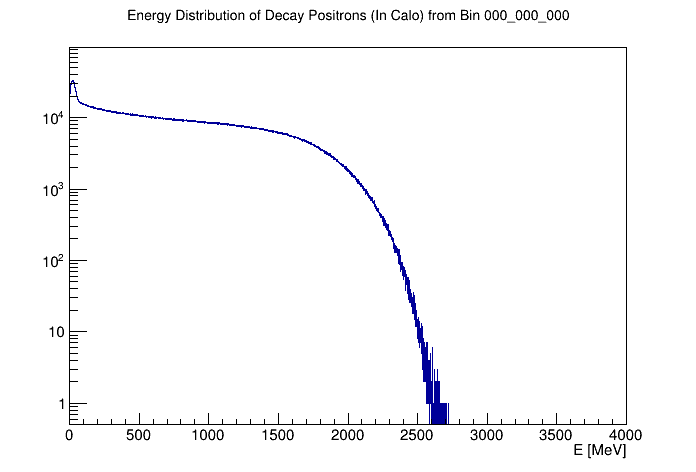

In [10]:
he.ProjectionX().Draw()
c.SetLogy()
c.Draw()

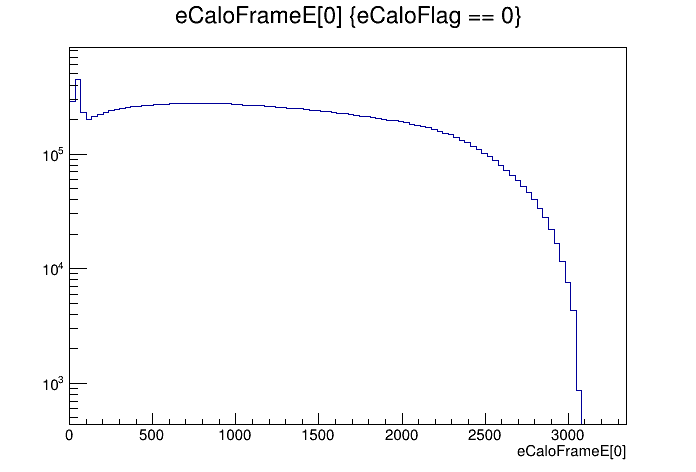

In [17]:
c = r.TCanvas()

t.Draw("eCaloFrameE[0]","eCaloFlag == 0","colz")

c.SetLogy()
c.Draw()

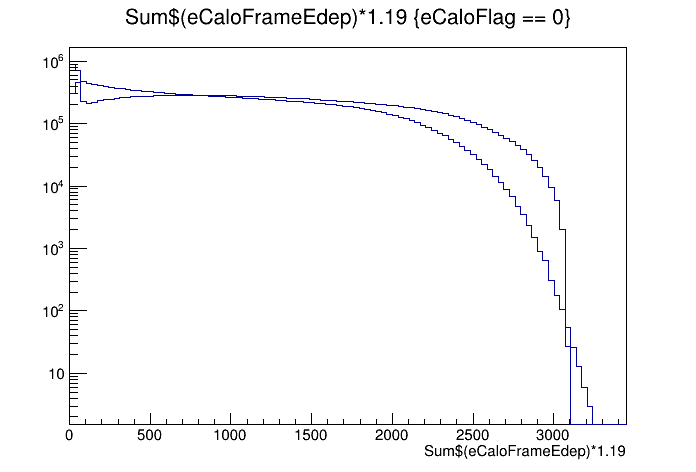

In [19]:
c = r.TCanvas()

t.Draw("Sum$(eCaloFrameEdep)*1.19","eCaloFlag == 0","colz")
t.Draw("eCaloFrameE[0]","eCaloFlag == 0","same")

c.SetLogy()
c.Draw()